# Model: Transfer learning with Chest-Ray data and DenseNet

**Compiler**

- loss function: binary crossentropy
- optimizer: adam

**Fit**

-  Epochs: 5

**Metrics**
- Recall for train: 0.98
- Precision for val: 0.62
- F1: 0.76

In [49]:
#model.summary() #uncomment to see all layers

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import os
import cv2

import matplotlib.pyplot as plt

In [3]:
from keras.applications import DenseNet121

This code will load the train data

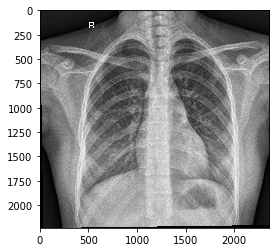

In [4]:
DATADIR = 'data/train'
CATEGORIES = ['NORMAL', 'PNEUMONIA']
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array,)
        plt.show()
        break
    break

Resizing the images to 150 x 150 pixels

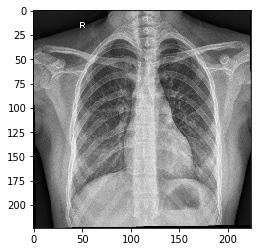

In [5]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array)

In [6]:
new_array.shape

(224, 224, 3)

Finally we can create our training dataset

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(img, e)
create_training_data()

In [8]:
import random
random.shuffle(training_data)

In [9]:
import numpy as np

In [10]:
X = []

y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)

## Importing DenseNet

In [11]:
densenet_model = keras.applications.DenseNet121(include_top = False)

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#densenet_model.summary()

In [13]:
from keras.layers import Dense, GlobalAveragePooling2D

from keras.models import Model

In [14]:
# add a global spatial average pooling layer
x = densenet_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

In [15]:
model = Model(inputs=densenet_model.input, outputs=predictions)

In [ ]:
#model.summary()

In [17]:
for layer in densenet_model.layers:
    layer.trainable = False

In [18]:
from keras import metrics

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


datagen = ImageDataGenerator()

In [21]:
from keras.utils import np_utils

In [22]:
y_train = np_utils.to_categorical(y, 2)

In [23]:
y_train.shape

(5216, 2)

## Fit

In [24]:
model.fit(x = X, y = y_train, batch_size= 64, epochs = 5, verbose= 2, validation_split= 0.1 )

Instructions for updating:
Use tf.cast instead.
Train on 4694 samples, validate on 522 samples
Epoch 1/5
 - 736s - loss: 0.4195 - val_loss: 1.9505
Epoch 2/5
 - 742s - loss: 0.1495 - val_loss: 1.3383
Epoch 3/5
 - 725s - loss: 0.1204 - val_loss: 1.7038
Epoch 4/5
 - 736s - loss: 0.1051 - val_loss: 1.3433
Epoch 5/5
 - 746s - loss: 0.0975 - val_loss: 1.4610


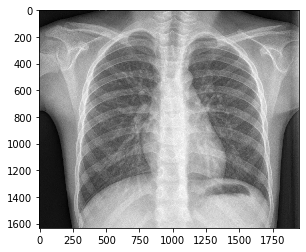

In [25]:
DATADIR = 'data/test'
CATEGORIES = ['NORMAL', 'PNEUMONIA']
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array,)
        plt.show()
        break
    break

In [26]:
test_data = []

def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                print(img, e)
create_test_data()

In [27]:
X_test = []

y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test)

In [28]:
X_test.shape

(624, 224, 224, 3)

In [118]:
y_test = np_utils.to_categorical(y_test, 2)
y_test.shape

(624, 2, 2, 2, 2, 2)

In [30]:
model.evaluate(X_test, y_test)


624/624 [==============================] - 95s 152ms/step


2.436650031938767

In [119]:
y_test_pred = model.predict(X_test)
y_test_pred.shape

(624, 2)

In [32]:
from sklearn.metrics import recall_score, precision_score

## Metrics

In [33]:
recall_score(y_test[:,1], y_test_pred[:, 1].round())

0.982051282051282

In [34]:
precision_score(y_test[:,1], y_test_pred[:, 1].round())

0.6227642276422765

In [37]:
f1_score(y_test[:,1], y_test_pred[:, 1].round())

0.7621890547263682

In [38]:
accuracy_score(y_test[:,1], y_test_pred[:, 1].round())

0.6169871794871795